In [1]:
from libs.foxutils.utils.core_utils import settings, datasets_dir
import pandas as pd 
import numpy as np 
from os.path import join as pathjoin 

dataset_name = "small_cell_nodes"
project_name = settings["RUN"]["project_name"]

INFO:root:torch is not installed


In [2]:
print(f"Run project {project_name} for data {dataset_name}")
target_name = "slice Type"

def preprocess(filename = "train.csv"):
    datafile = pathjoin(datasets_dir, project_name, dataset_name, filename)
    df = pd.read_csv(datafile, index_col=None)
    if not (target_name in df.columns):
        target_col = None
    else:
        target_col = df[target_name]
        df.drop(columns=[target_name], inplace=True)
    
    #df["Use Case"]=df["Use Case"].astype('category').cat.codes

    return df, target_col 

df, target_col = preprocess("train.csv")

num_cols = len(df.columns)
num_rows = len(df)
num_classes = len(np.unique(target_col))

print(f"Num cols: {num_cols}. Num rows: {num_rows}. Num classes: {num_classes}")
print(f"Name cols: {df.columns}")
print(f"Target col: {target_name}")
df.head()

Run project explor for data small_cell_nodes
Num cols: 22. Num rows: 2391. Num classes: 1
Name cols: Index(['OWNERNAME', 'APPLICANTCOMPANYNAME', 'PERMITMASTERNUMBER',
       'PERMITREFNUMBER', 'NODEGROUP', 'NODEID', 'NODEADDRESS', 'NODE_N',
       'NODE_E', 'NODETYPE', 'STATUS', 'POLEMATERIAL', 'POLEMANUFACTURER',
       'POLEMODEL', 'POLEHEIGHT_FT', 'POLECOLOR', 'RFEQUIPMENT', 'INTENDEDUSE',
       'ASSETOWNER', 'SITEID', 'FIXEDASSETID', 'COUNCIL_DISTRICT'],
      dtype='object')
Target col: slice Type


,OWNERNAME,APPLICANTCOMPANYNAME,PERMITMASTERNUMBER,PERMITREFNUMBER,NODEGROUP,NODEID,NODEADDRESS,NODE_N,NODE_E,NODETYPE,...,POLEMANUFACTURER,POLEMODEL,POLEHEIGHT_FT,POLECOLOR,RFEQUIPMENT,INTENDEDUSE,ASSETOWNER,SITEID,FIXEDASSETID,COUNCIL_DISTRICT
0,Mobilitie,Mobilitie,NaN,NaN,2018 Group 1A,DN90XS379E,1692 Glenarm PL,39.744554,-104.989407,"Type 3A, Combo Pole w/Cantenna",...,CompTek,1002661,30.0,Federal Green (RAL 6012),CCI SCA-DR1-65F6-E-H2S-K(Panel Ant),Single Carrier,,NaN,NaN,9
1,Mobilitie,Mobilitie,NaN,NaN,2018 Group 3\r\n,DN90XS381B\r\n,1652 N. Lincoln St.\r\n,39.742565,-104.985513,"Type 1A, Utility Pole Mounted",...,Other,TBD by Xcel\r\n,34.0,,Alpha AW3477-S (Omni B41),Single Carrier,,NaN,NaN,10
2,Mobilitie,Mobilitie,NaN,NaN,2018 Group 1A\r\n,DN90XSG53C\r\n,1688 Welton St.\r\n,39.745220,-104.990277,"Type 3A, Combo Pole w/Cantenna",...,CompTek,1002661,30.0,Federal Green (RAL 6012),CCI SCA-DR1-65F6-E-H2S-K(Panel Ant),Single Carrier,,NaN,NaN,9
3,Mobilitie,Mobilitie,NaN,NaN,2018 Group 1A\r\n,DN90XSH39C\r\n,1231 Glenarm PL.\r\n,39.740519,-104.994896,"Type 3A, Combo Pole w/Cantenna",...,CompTek,1002661,30.0,Federal Green (RAL 6012),CCI SCA-DR1-65F6-E-H2S-K(Panel Ant),Single Carrier,,NaN,NaN,9
4,Mobilitie,Mobilitie,NaN,NaN,2018 Group 1B\r\n,DN90XSH55D\r\n,1461 N. Delaware St.\r\n,39.739439,-104.993035,"Type 3A, Combo Pole w/Cantenna",...,CompTek,1002661,30.0,Federal Green (RAL 6012),CCI SCA-DR1-65F6-E-H2S-K(Panel Ant),Single Carrier,,NaN,NaN,10


In [3]:
df = (
    df.loc[:,['OWNERNAME','NODE_N','NODE_E','APPLICANTCOMPANYNAME', 'NODETYPE', 'STATUS']]
    .dropna()
)

df.head()

,OWNERNAME,NODE_N,NODE_E,APPLICANTCOMPANYNAME,NODETYPE,STATUS
0,Mobilitie,39.744554,-104.989407,Mobilitie,"Type 3A, Combo Pole w/Cantenna",Existing
1,Mobilitie,39.742565,-104.985513,Mobilitie,"Type 1A, Utility Pole Mounted",Existing
2,Mobilitie,39.745220,-104.990277,Mobilitie,"Type 3A, Combo Pole w/Cantenna",Existing
3,Mobilitie,39.740519,-104.994896,Mobilitie,"Type 3A, Combo Pole w/Cantenna",Existing
4,Mobilitie,39.739439,-104.993035,Mobilitie,"Type 3A, Combo Pole w/Cantenna",Existing


In [4]:
from utils import split_train_test, exploratory_analysis, encode_labels

labels = df['STATUS']
df2 = df.copy()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df2['OWNERNAME'] = label_encoder.fit_transform(df2['OWNERNAME'])
df2['APPLICANTCOMPANYNAME'] = label_encoder.fit_transform(df2['APPLICANTCOMPANYNAME'])
df2['NODETYPE'] = label_encoder.fit_transform(df2['NODETYPE'])
df2['STATUS'] = label_encoder.fit_transform(df2['STATUS'])

X_train, X_test, y_train, y_test = split_train_test(df2, labels, test_size=0.2)
le, y_train_onehot, y_test_onehot = encode_labels(y_train, y_test)
#exploratory_analysis(X_train, y_train_onehot)

In [5]:
np.unique(df['APPLICANTCOMPANYNAME'])

array(['BV', 'Crown Castle', 'Mobilitie', 'Smartlink', 'Verizon Wireless',
       'Zayo Group, LLC'], dtype=object)

In [6]:
np.unique(df['OWNERNAME'])

array(['ATT', 'Crown Castle', 'Mobilitie', 'VERIZON', 'Zayo Group, LLC'],
      dtype=object)

In [7]:
np.unique(df['NODETYPE'])

array(['Type 1A, Utility Pole Mounted',
       'Type 1B, Utility Pole Strand Mounted',
       'Type 2, Wood Street Light Mounted',
       'Type 3A, Combo Pole w/Cantenna',
       'Type 3B, Combo Pole w/External Shroud',
       'Type 3C, Combo Pole w/Cantenna, External Shroud',
       'Type 4, Single-Carrier Freestanding Pole',
       'Type 6A, Multi-Tenant Freestanding Pole A'], dtype=object)

In [8]:
np.unique(df['STATUS'])

array(['Existing', 'Future Planned 1-2 Year', 'Future Planned 1-2 year',
       'Installed', 'Proposed'], dtype=object)

In [9]:
ids = [x for (x,y) in zip(df.index, df["STATUS"]) if (y != "Proposed")]
df_existing = df.iloc[ids]
#target_col = target_col[ids]

num_cols = len(df_existing.columns)
num_rows = len(df_existing)
print(f"Num cols: {num_cols}. Num rows: {num_rows}.")


Num cols: 6. Num rows: 909.


In [10]:
import folium as fl

m = fl.Map(location=[39.742793, -105.0109598],zoom_start=11)

for lat,long,owner in zip(df_existing.NODE_N,df_existing.NODE_E,df.OWNERNAME):
    fl.Marker([lat,long],popup=owner).add_to(m)

m

In [11]:

from folium.plugins import HeatMap

heat = fl.Map(location=[39.742793, -105.0109598],zoo_start=11)

data = [[lat,long] for lat,long in zip(df_existing.NODE_N,df_existing.NODE_E)]

HeatMap(data,radius=15).add_to(heat)

heat

In [12]:
# Proposed 

ids = [x for (x,y) in zip(df.index, df["STATUS"]) if (y == "Proposed")]
df_proposed = df.iloc[ids]
#target_col = target_col[ids]

num_cols = len(df_proposed.columns)
num_rows = len(df_proposed)
print(f"Num cols: {num_cols}. Num rows: {num_rows}.")

heat = fl.Map(location=[39.742793, -105.0109598],zoo_start=11)

data = [[lat,long] for lat,long in zip(df_proposed.NODE_N,df_proposed.NODE_E)]

HeatMap(data,radius=15).add_to(heat)

heat

Num cols: 6. Num rows: 1482.


In [13]:
def get_label(val):
    if val == "Proposed": 
        return 1
    elif val == "Future Planned 1-2 Year": 
        return 0
    elif val == "Future Planned 1-2 year": 
        return 0
    else: 
        return 2 
    
df["proposed"] = [ get_label(x) for x in df["STATUS"]]
df = df[df["proposed"] < 2]
df.reset_index(inplace=True)

In [14]:
df.head()

,index,OWNERNAME,NODE_N,NODE_E,APPLICANTCOMPANYNAME,NODETYPE,STATUS,proposed
0,8,ATT,39.715104,-104.940872,Smartlink,"Type 3A, Combo Pole w/Cantenna",Future Planned 1-2 year,0
1,9,ATT,39.720317,-104.940894,Smartlink,"Type 3A, Combo Pole w/Cantenna",Future Planned 1-2 year,0
2,10,ATT,39.730652,-104.940534,Smartlink,"Type 3A, Combo Pole w/Cantenna",Future Planned 1-2 year,0
3,11,ATT,39.663083,-104.940541,Smartlink,"Type 3A, Combo Pole w/Cantenna",Future Planned 1-2 year,0
4,12,ATT,39.653204,-104.924379,Smartlink,"Type 3A, Combo Pole w/Cantenna",Future Planned 1-2 year,0


In [15]:
print(df['NODE_N'].describe())
df = df[df['OWNERNAME'] != 'Crown Castle']
print(df['NODE_N'].describe())

count    1.916000e+03
mean     2.784805e+05
std      6.279086e+05
min      3.962414e+01
25%      3.971538e+01
50%      3.974763e+01
75%      3.977713e+01
max      1.716303e+06
Name: NODE_N, dtype: float64
count    1601.000000
mean       39.733095
std         0.036524
min        39.624139
25%        39.710448
50%        39.738776
75%        39.759277
max        39.825545
Name: NODE_N, dtype: float64


In [16]:
print(df['NODE_E'].describe())
#df = df[df['OWNERNAME'] != 'Crown Castle']
#print(df['NODE_N'].describe())

count    1601.000000
mean     -104.960529
std         0.061447
min      -105.090463
25%      -105.008142
50%      -104.962780
75%      -104.922283
max      -104.737108
Name: NODE_E, dtype: float64


In [17]:
import numpy as np
from scipy.spatial import distance
#Square side: L
Lx = df['NODE_N'].max() #10
Ly = df['NODE_E'].max() #10
L0x = df['NODE_N'].min() #10
L0y = df['NODE_E'].min() #10
Lmx = df['NODE_N'].mean() #10
Lmy = df['NODE_E'].mean() #10

print(f"Origin x [{L0x}, {Lx}], Origin y [{L0y},{Ly}], Center[{Lmx},{Lmy}]")

#Average number of points (Poisson)
x_average_PPP = len(df) #25
print(x_average_PPP)

#pathloss
alpha=4
num_realizations = 200
nearest_point = np.zeros(num_realizations)
nearest_point_arbitrary = np.zeros(num_realizations)
interference = np.zeros(num_realizations)

for count in range(0, num_realizations):
    #Number of points N that is a Poisson random variable 
    x_realization_PPP = np.random.poisson(x_average_PPP,1)[0]
    #Random points in axis x
    position_x_realization_PPP = np.random.uniform(L0x,Lx,x_realization_PPP)
    #Random points in axis y
    position_y_realization_PPP = np.random.uniform(L0y,Ly,x_realization_PPP) 
    #Manipulating arrays
    position_x_realization_PPP_t=np.transpose(position_x_realization_PPP)
    position_y_realization_PPP_t=np.transpose(position_y_realization_PPP)
    position_final = []
    position_final = [[position_x_realization_PPP_t[ix], position_y_realization_PPP_t[ix]] for ix in range(0, x_realization_PPP)]
    #Distances to the origin (L/2,L/2)
    distances_to_origin = [distance.euclidean(position_final[ix],[Lmx,Lmy]) for ix in range(0, x_realization_PPP)]

    #Distances to arbitrary (x,y) - always get the first in the position vector
    distances_to_arbitrary = [distance.euclidean(position_final[ix],position_final[0]) for ix in range(1, x_realization_PPP)]
    #Ordering distances
    ordered_dists = np.sort(distances_to_origin)
    #print(ordered_dists)
    ordered_dists_arbitrary = np.sort(distances_to_arbitrary)
    #print(ordered_dists_arbitrary)
    #Getting the nearest
    nearest_point[count] = ordered_dists[0]
    nearest_point_arbitrary[count] = ordered_dists_arbitrary[0]
    #getting the power of each interferer
    path_loss = np.array([distances_to_origin[xx]**(-alpha) for xx in range(0, x_realization_PPP)])
    #computing aggregate interference
    interference[count] = sum(path_loss) 
    count = count + 1
    
#print(nearest_point)
#print(nearest_point_arbitrary)

Origin x [39.62413889, 39.825545], Origin y [-105.090463,-104.737108], Center[39.73309529950656,-104.9605289008807]
1601


In [18]:
from folium.plugins import HeatMap

heat = fl.Map(location=[39.742793, -105.0109598],zoo_start=11)

data = [[lat,long] for lat,long in zip(position_x_realization_PPP,position_y_realization_PPP)]

HeatMap(data,radius=15).add_to(heat)

heat

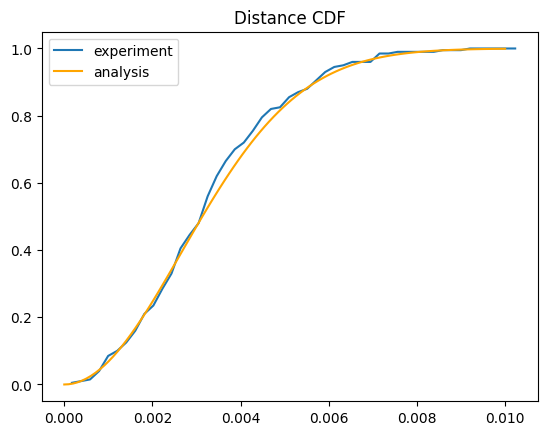

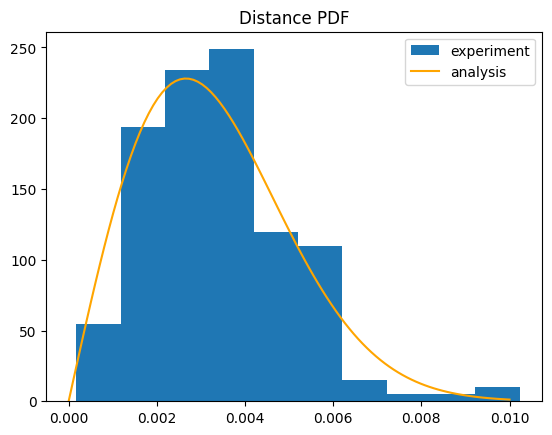

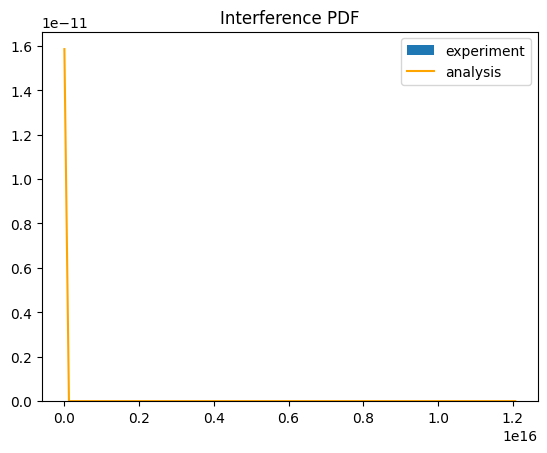

In [19]:
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt
L = Lx-L0x
L2 = Ly - L0y
#
ecdf = sm.distributions.ECDF(nearest_point)
plt.figure()
#x = np.linspace(min(nearest_point), max(nearest_point))
x = np.linspace(min(nearest_point_arbitrary), max(nearest_point_arbitrary))
y = ecdf(x)
plt.plot(x, y, label='experiment')
x = np.linspace(0,0.01,100)
plt.plot(x, 1 - np.exp(- (x**2) * np.pi * x_average_PPP/(L*L2)), color="orange", label='analysis')
plt.legend()
plt.title('Distance CDF')
plt.show()

#Testing pdf
from __future__ import division
x = np.linspace(0,0.01,100)
#
plt.figure()
#plt.hist(nearest_point,normed=True, color="#6495ED")
plt.hist(nearest_point_arbitrary, density = True, label='experiment')
#
plt.plot(x, 2 * np.pi * x * (x_average_PPP/(L*L2)) * np.exp(- (x**2) * np.pi * (x_average_PPP/(L*L2))), '-',  color="orange", label='analysis')
plt.legend()
plt.title('Distance PDF')
plt.show()

#interference pdf
import matplotlib.pyplot as plt
from __future__ import division
x = np.linspace(np.min(interference),np.max(interference),100)
#
plt.figure()
plt.hist(interference, density = True, label='experiment')
#
plt.plot(x, (np.pi *(x_average_PPP/(L*L2))/(2*x**(1.5)) * np.exp(- (np.pi**3 * (x_average_PPP/(L*L2))**2)/(4*x) )), '-', color="orange", label='analysis')
plt.legend()
plt.title('Interference PDF')
plt.show()

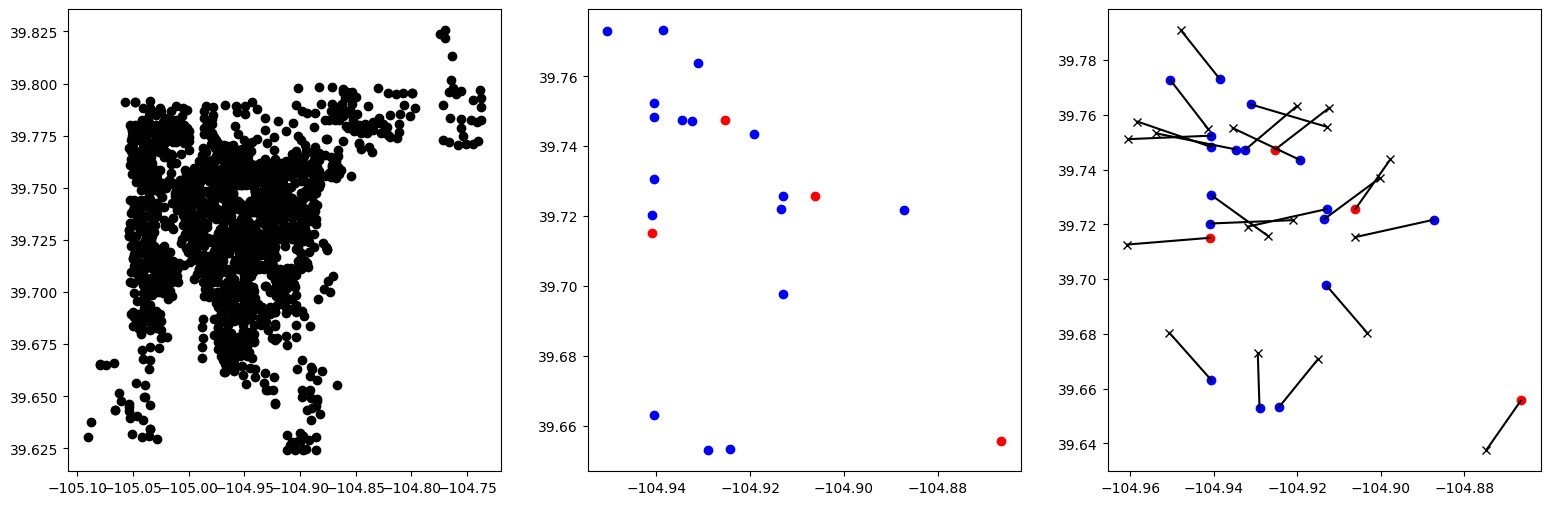

In [58]:
#################
#Illustration####
#################

from matplotlib import pyplot as plt
import numpy as np

#########################
###(1) Ground process###
########################
#Square side: L2
L2 = 10
#Average number of points (Poisson)
x_average_PPP = 20
#Number of points N that is a Poisson random variable 
x_realization_PPP = np.random.poisson(x_average_PPP,1)
#Random points in axis x
position_x_realization_PPP_TX = np.array(df['NODE_E'].values, ndmin=1)  #np.random.uniform(L0x,Lx,x_realization_PPP)
#Random points in axis y
position_y_realization_PPP_TX =  np.array(df['NODE_N'].values, ndmin=1)# np.random.uniform(L0y,Ly,x_realization_PPP) 


fig, axes = plt.subplots(1, 3, figsize=(19,6))

#Plot commands
axes[0].plot(position_x_realization_PPP_TX, position_y_realization_PPP_TX, marker='o', color='k',linestyle = '')
#plt.axis('off')

#####################
###(2) ALOHA #######
####################

#aloha probability
p=0.7

#declaring a list of unknown size
position_x_realization_PPP_TX_e_1 = []
position_y_realization_PPP_TX_e_1 = []
position_x_realization_PPP_TX_e_0 = []
position_y_realization_PPP_TX_e_0 = []


for xx in range(0,x_realization_PPP[0]):
    if np.random.random() < p:
        #add element to the list
        position_x_realization_PPP_TX_e_1.append(position_x_realization_PPP_TX[xx])
        position_y_realization_PPP_TX_e_1.append(position_y_realization_PPP_TX[xx])
    else:
        #add element to the list
        position_x_realization_PPP_TX_e_0.append(position_x_realization_PPP_TX[xx])
        position_y_realization_PPP_TX_e_0.append(position_y_realization_PPP_TX[xx])
    xx+=1
    
#converting the list to a np.array
position_x_realization_PPP_TX_e_1 = np.array(position_x_realization_PPP_TX_e_1)
position_y_realization_PPP_TX_e_1 = np.array(position_y_realization_PPP_TX_e_1 )
position_x_realization_PPP_TX_e_0 = np.array(position_x_realization_PPP_TX_e_0)
position_y_realization_PPP_TX_e_0 = np.array(position_y_realization_PPP_TX_e_0)


axes[1].plot(position_x_realization_PPP_TX_e_1, position_y_realization_PPP_TX_e_1, marker='o', color='b',linestyle = '')
axes[1].plot(position_x_realization_PPP_TX_e_0, position_y_realization_PPP_TX_e_0, marker='o', color='r',linestyle = '')

#####################
###(3) Receivers####
####################

#distance between TX-RX (fixed)
dist_TX_RX = 0.02

#angles of the receivers
angle_RX = np.random.uniform(0,2*np.pi,x_realization_PPP)
#setting arrays
position_x_realization_PPP_RX = np.zeros(x_realization_PPP)
position_y_realization_PPP_RX = np.zeros(x_realization_PPP)

#RXs position
for xx in range(0,x_realization_PPP[0]):
    position_x_realization_PPP_RX[xx] = position_x_realization_PPP_TX[xx] + dist_TX_RX*np.cos(angle_RX[xx])
    position_y_realization_PPP_RX[xx] = position_y_realization_PPP_TX[xx] + dist_TX_RX*np.sin(angle_RX[xx])
    xx+=1


axes[2].plot(position_x_realization_PPP_RX, position_y_realization_PPP_RX, marker='x', color='k',linestyle = '')
axes[2].plot(position_x_realization_PPP_TX_e_1, position_y_realization_PPP_TX_e_1, marker='o', color='b',linestyle = '')
axes[2].plot(position_x_realization_PPP_TX_e_0, position_y_realization_PPP_TX_e_0, marker='o', color='r',linestyle = '')
#plot lines between links - bipoles
axes[2].plot([position_x_realization_PPP_TX[0:len(position_x_realization_PPP_RX)], position_x_realization_PPP_RX],
         [position_y_realization_PPP_TX[0:len(position_y_realization_PPP_RX)], position_y_realization_PPP_RX],  color='k',linestyle = '-')

plt.show()